In [1]:
import sqlite3
import random
from datetime import datetime, timedelta

# Connect to your database (department.db)
conn = sqlite3.connect('department.db')
cur = conn.cursor()

# Create the Students table if it doesn't already exist
cur.execute('''
CREATE TABLE IF NOT EXISTS Students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    date_of_birth DATE,
    gender TEXT,
    Financial_Aid TEXT,
    enrollment_date DATE
)
''')

conn.commit()
print("Students table is ready.")

# Helper function to generate a random date between two dates
def random_date(start, end):
    delta = end - start
    random_days = random.randrange(delta.days)
    return start + timedelta(days=random_days)

# Define date ranges for date_of_birth and enrollment_date
start_dob = datetime(1980, 1, 1)
end_dob = datetime(2005, 12, 31)

start_enrollment = datetime(2019, 1, 1)
end_enrollment = datetime(2023, 12, 31)

# List of sample genders
genders = ["Male", "Female"]

# Generate 500 student records
students = []
for _ in range(500):
    dob = random_date(start_dob, end_dob).strftime("%Y-%m-%d")
    gender = random.choice(genders)
    financial_aid = random.choice(["True", "False"])  # true/false category for financial aid
    enrollment_date = random_date(start_enrollment, end_enrollment).strftime("%Y-%m-%d")
    students.append((dob, gender, financial_aid, enrollment_date))

# Insert the generated data into the Students table
cur.executemany('''
INSERT INTO Students (date_of_birth, gender, Financial_Aid, enrollment_date)
VALUES (?, ?, ?, ?)
''', students)

conn.commit()
print("Inserted 500 student records into the Students table.")

# Optional: Verify the first few records
cur.execute('SELECT * FROM Students LIMIT 5')
rows = cur.fetchall()
for row in rows:
    print(row)

conn.close()


Students table is ready.
Inserted 500 student records into the Students table.
(1, '2005-12-12', 'Female', 'False', '2022-10-30')
(2, '1990-12-07', 'Male', 'True', '2022-02-13')
(3, '1983-06-10', 'Male', 'True', '2023-02-14')
(4, '1991-06-08', 'Female', 'True', '2023-12-25')
(5, '2001-09-17', 'Male', 'True', '2022-09-25')


In [2]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect('department.db')

# Load the Students table into a DataFrame
df = pd.read_sql_query("SELECT * FROM Students", conn)

conn.close()

# Convert date columns to datetime objects
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])

# For analysis, extract the month from date_of_birth and the year from enrollment_date
df['birth_month'] = df['date_of_birth'].dt.month
df['enrollment_year'] = df['enrollment_date'].dt.year


C:\Users\HP\AppData\Local\Temp\ipykernel_12976\1811815224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='birth_month', data=df, palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_12976\1811815224.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_12976\1811815224.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Financial_Aid', data=df, palette="viridis")
C:\Users\HP\AppData\Local\Temp\ipykernel_12976\1811815224.py:31: FutureWarni

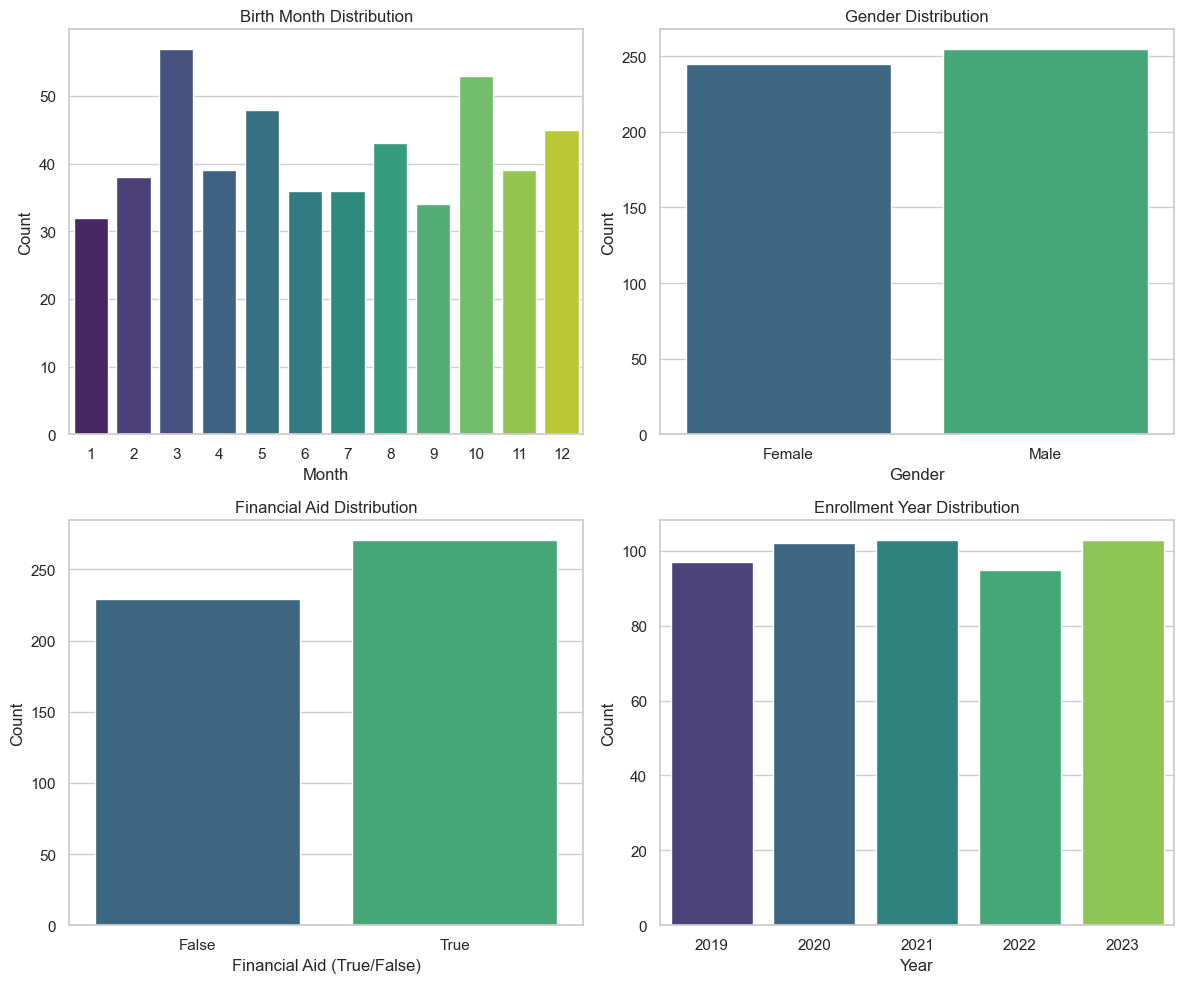

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Plot 1: Distribution of Birth Months
plt.subplot(2, 2, 1)
sns.countplot(x='birth_month', data=df, palette="viridis")
plt.title("Birth Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")

# Plot 2: Distribution by Gender
plt.subplot(2, 2, 2)
sns.countplot(x='gender', data=df, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Plot 3: Distribution by Financial Aid Status
plt.subplot(2, 2, 3)
sns.countplot(x='Financial_Aid', data=df, palette="viridis")
plt.title("Financial Aid Distribution")
plt.xlabel("Financial Aid (True/False)")
plt.ylabel("Count")

# Plot 4: Distribution of Enrollment Years
plt.subplot(2, 2, 4)
sns.countplot(x='enrollment_year', data=df, palette="viridis")
plt.title("Enrollment Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [4]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.0 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.0 MB 8.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.0 MB 8.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib seaborn


  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
U

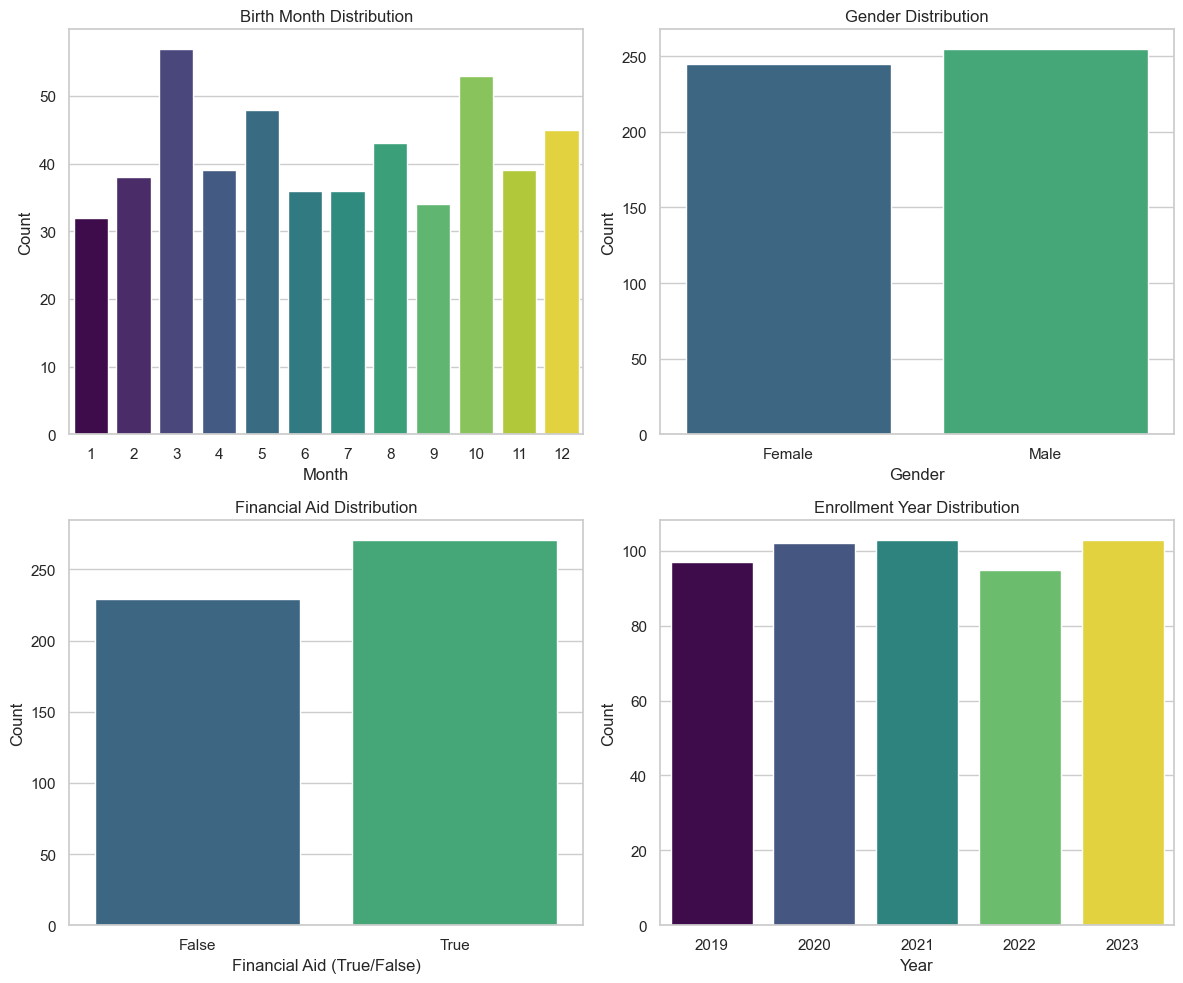

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('department.db')
df = pd.read_sql_query("SELECT * FROM Students", conn)
conn.close()

# Convert date columns to datetime objects
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])

# Extract month from date_of_birth and year from enrollment_date
df['birth_month'] = df['date_of_birth'].dt.month
df['enrollment_year'] = df['enrollment_date'].dt.year

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Plot 1: Distribution of Birth Months
plt.subplot(2, 2, 1)
sns.countplot(x='birth_month', data=df, hue='birth_month', palette="viridis")
plt.title("Birth Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend([],[], frameon=False)

# Plot 2: Distribution by Gender
plt.subplot(2, 2, 2)
sns.countplot(x='gender', data=df, hue='gender', palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend([],[], frameon=False)

# Plot 3: Distribution by Financial Aid Status
plt.subplot(2, 2, 3)
sns.countplot(x='Financial_Aid', data=df, hue='Financial_Aid', palette="viridis")
plt.title("Financial Aid Distribution")
plt.xlabel("Financial Aid (True/False)")
plt.ylabel("Count")
plt.legend([],[], frameon=False)

# Plot 4: Distribution of Enrollment Years
plt.subplot(2, 2, 4)
sns.countplot(x='enrollment_year', data=df, hue='enrollment_year', palette="viridis")
plt.title("Enrollment Year Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()
